# Task 5

# SALES PREDICTION USING PYTHON

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("Advertising.csv")
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [3]:
data = data.drop(axis = 1, columns = ["Unnamed: 0"])
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# EDA

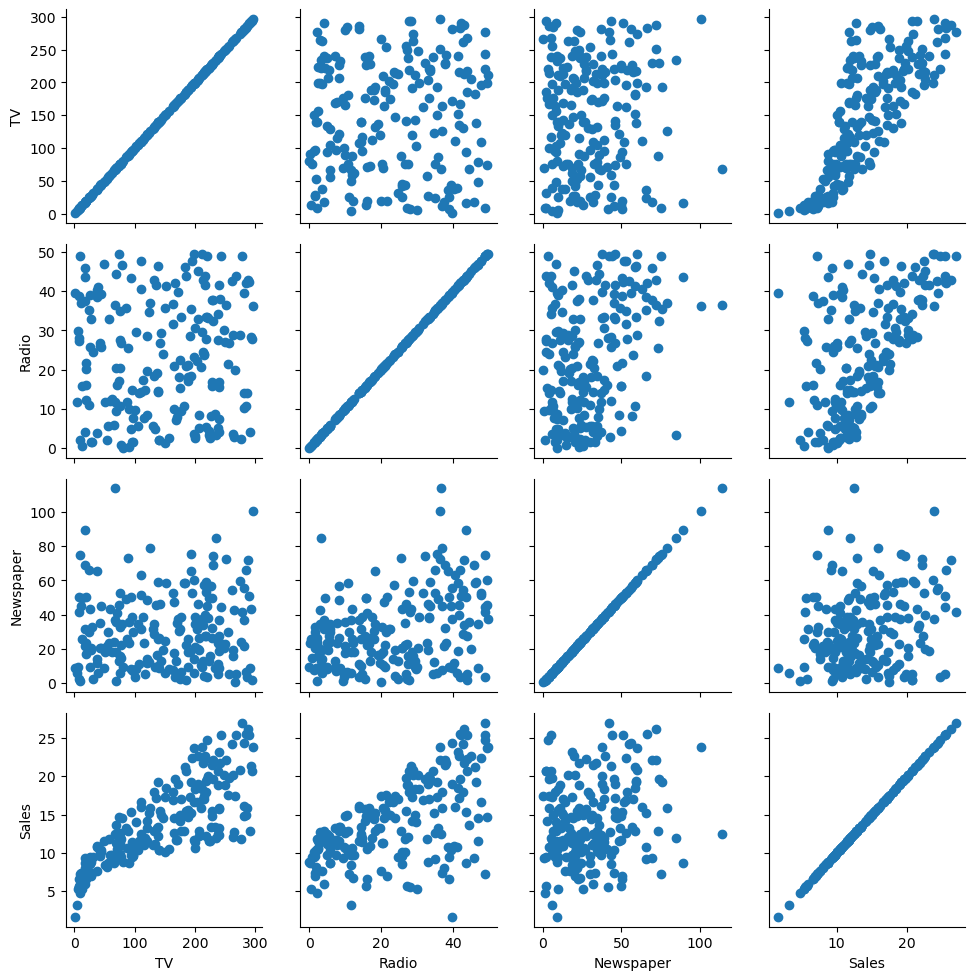

In [4]:
v = sns.PairGrid(data)
v.map(plt.scatter)

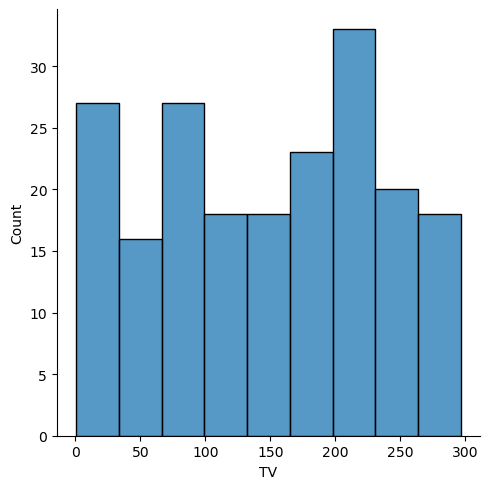

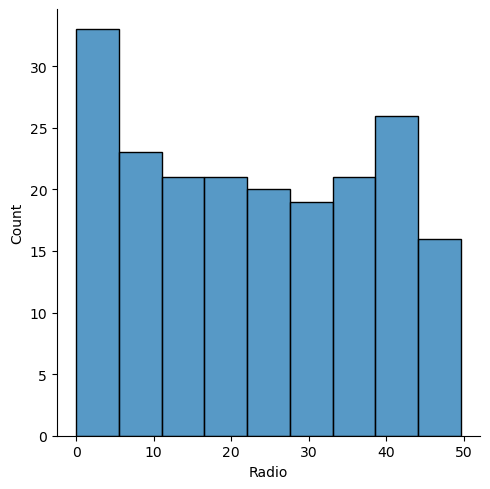

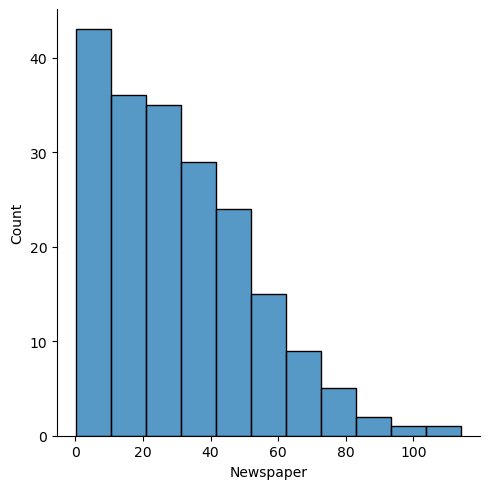

In [5]:
d = ['TV', 'Radio', 'Newspaper']
for i in d:
    sns.displot(data[i])

In [6]:
x = data.drop(columns = ["Sales"], axis = 1)
y = data["Sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 41)
s = [x_train, x_test, y_train, y_test]
for i in s:
    print(i.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Model Building

In [8]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [9]:
lr = LinearRegression()
lrm = lr.fit(x_train, y_train)
lrm.score(x_test, y_test)

0.8962913252219633

# Ridge with hyperparameter tuning

In [10]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5)
grid_search_ridge.fit(x_train, y_train)
best_params_ridge = grid_search_ridge.best_params_  


In [11]:
grid_search_ridge.score(x_test, y_test)

0.8963016049607366

# Lasso with hyperparameter tuning

In [12]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 2000, 3000]
}

lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5)
grid_search_lasso.fit(x_train, y_train)  
best_params_lasso = grid_search_lasso.best_params_  


In [13]:
grid_search_lasso.score(x_test, y_test)

0.8974850179568801

# Elastic net with hyperparameter tuning

In [14]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.01, 0.25, 0.5, 0.75, 1],  
    'max_iter': [1000, 2000, 3000] 
}
elastic_net = ElasticNet()
grid_search_elastic_net = GridSearchCV(elastic_net, param_grid, cv=5)
grid_search_elastic_net.fit(x_train, y_train)
best_params_elastic_net = grid_search_elastic_net.best_params_ 

In [15]:
grid_search_elastic_net.score(x_test, y_test)

0.8974850179568801

# DecisionTreeRegressor with hyperparameter tuning

In [16]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}
decision_tree = DecisionTreeRegressor()
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search_decision_tree.fit(x_train, y_train)  
best_params_decision_tree = grid_search_decision_tree.best_params_  

In [17]:
grid_search_decision_tree.score(x_test, y_test)

0.9621262782643951

# RandomForestRegressor with hyperparameter tuning

In [18]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4] 
}
random_forest = RandomForestRegressor()
grid_search_random_forest = GridSearchCV(random_forest, param_grid, cv=5)
grid_search_random_forest.fit(x_train, y_train)
best_params_random_forest = grid_search_random_forest.best_params_  

In [19]:
grid_search_random_forest.score(x_test, y_test)

0.9780194921741185

# XGBoost  with hyperparameter tuning

In [23]:
param_grid = {
    'learning_rate': np.linspace(0.01, 0.2, 20),
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': np.linspace(0.8, 1, 10),
    'gamma': np.linspace(0, 0.2, 10),
    'reg_alpha': np.linspace(0, 0.2, 10),
    'reg_lambda': np.linspace(0, 0.2, 10)
}

xgb_regressor = XGBRegressor(n_jobs=-1)
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_regressor,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [24]:
random_search_xgb.fit(x_train, y_train)
print("Best Parameters: ", random_search_xgb.best_params_)
print("Best Score: ", random_search_xgb.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'subsample': 0.9111111111111111, 'reg_lambda': 0.022222222222222223, 'reg_alpha': 0.13333333333333333, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.12, 'gamma': 0.06666666666666667}
Best Score:  0.9838753177231606


In [25]:
random_search_xgb.score(x_test, y_test)

0.9773442716148921

# Thank you